# Analysis of Movie Data
### Xinlu Shen, Yifan Qin, Qianyin Huang

---
## To Do List (Table of Contents):
### 1. Introduction
### 2. Getting Started
* 2.1 Required Libraries
* 2.2 Load Data

### 3. Data Cleaning
* 3.1 Remove NaN
* 3.2 Remove the Unwanted Columns
* 3.3 Organize the Dataset

### 4. Data Exploration and Visualization
* 4.1 Top 15 Movies Based on Gross and IMDB Score
  * 4.1.1 Gross vs Budget
  * 4.1.2 Gross vs IMDB Score
* 4.2 Violin Plot (Gross/Score V.S Year)
* 4.3 Genre
* 4.4 Facebook Likes

### 5. Conclusion

---
## 1. Introduction

Movie is a combination of technology, industry and art. As an international media, it is bound to the global art trends and international film market. The artistry, economy and culture of movies are inseparable from people's lives. Therefore, from the perspective of cultural transmission and economic development, we need to conduct in-depth research on the development trend of movies, so as to better promote them. <p/>
 
The use the dataset https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset from Kaggle. This file contains metadata of 5000 movies from 1916 to 2016. Data points include: <p/>

- Color (Color or 'Black and White') 
- Director_name (name of the director) 
- Num_critic_for_reviews (Number of critical reviews on Imdb) 
- Duration (how long is the movie) 
- Director_facebook_likes (likes on director’s facebook) 
- Actor_1_name 
- Actor_1_facebook_likes 
- Actor_2_name 
- Actor_2_facebook_likes 
- Actor_3_name 
- Actor_3_facebook_likes 
- Gross (gross earning of the movie) 
- Budget (budget for the film production) 
- Genres (genres of the movie, separated by | if it has more than 1) 
- Movie_title 
- Num_voted_users (Number of users who voted) 
- Cast_total_facebook_likes (Sum of facebook likes of the whole cast) 
- Facenumber_in_poster (number of people in the poster) 
- Plot_keywords (key words related to the movie) 
- Movie_imdb_link 
- Num_user_for_reviews 
- Language 
- Country 
- Content_rating 
- Title_year (The relaese year of the movie) 
- Imdb_score 
- Aspect_ratio 
- Movie_facebook_likes 
 
Our goal is to tidy the movie data provided above and figure out what makes a movie successful. 
We consider a movie successful if it has a relatively high IMDB sore or gross earning. Often only one of these two criteria can be satisfied, and many factors are taken into account to determine a movie's IMDB score or gross. Such factors can include genres, popularity of director and actors, etc.
This tutorial is going to explore how the factors contribute to the IMDB score or gross of a movie, and then make a comparison between IMDB score and gross with respect to t

---
## 2. Getting Started
### 2.1 Libraries
We used python3 with the following libraries:
- Pandas: a tool for data structures and data analysis
- Numpy: used for scientific computing, such as linear algebra and random number capabilities
- Seaborn: a data visualization library for making statistical graphics
- Scikit-learn: a useful library for machine learning and data mining.
- Math: used for some common math functions and constants
- Matplotlib: a library for plotting histograms, scatterplots, power spectra, etc
- Statsmodels: used to calculate statistical models and conducte statistical tests

In [578]:
import pandas as pd
import numpy as np
import seaborn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.cm as cm
import matplotlib.colors as colors
warnings.filterwarnings('ignore')

### 2.2 Load Data
Load the csv file into a **DataFrame** and use DataFrame.head() to look at the first 5 rows.<br/>

(Original csv file found from kaggle.com)

In [579]:
url = "https://raw.githubusercontent.com/mookee233/final_tutorial/master/movie_metadata.csv"
data = pd.read_csv(url)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**DataFrame.describe()** method gives some basic statistics about columns with quantitative values so that we can get some intuition.

In [580]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


---
## 3. Data Cleaning

### 3.1 Remove the Unwanted Columns
By accessing DataFrame.columns of the dataframe, we can get all columns, and that is all categories of information that we can explore on. <p/>
Then we can drop columns that are not needed in our later exploration.

In [581]:
print(data.columns)
movies = data.drop(['color', 'duration', 'movie_imdb_link','director_name', 'actor_1_name', \
    'actor_2_name', 'actor_3_name', 'aspect_ratio', 'facenumber_in_poster', "content_rating"], axis=1)
movies

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,Signed Sealed Delivered,629,2283,fraud|postal worker|prison|theft|trial,6.0,English,Canada,NaN,2013.0,470.0,7.7,84
5039,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,The Following,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,English,USA,NaN,NaN,593.0,7.5,32000
5040,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,A Plague So Pleasant,38,0,NaN,3.0,English,USA,1400.0,2013.0,0.0,6.3,16
5041,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,Shanghai Calling,1255,2386,NaN,9.0,English,USA,NaN,2012.0,719.0,6.3,660


### 3.2 Remove NaN
We will use the columns "gross" and "budget" later. But there are lots of NaN values, and it will effect the following analysis in a negative way. Thus, we need to remove entries with missing value.

In [582]:
for index, row in movies.iterrows():
  if pd.isnull(row["gross"]) == True or pd.isnull(row["title_year"]) == True or pd.isnull(row['budget']) == True or row["title_year"] < 2000:
    movies.drop(index, inplace=True)

movies.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1873,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,263700000.0,2012.0,632.0,6.6,24000


### 3.3 Organize the Dataset

The columns of the dataset is unsorted and hard to understand. We have to reorganize the order of columns to make the dataset easy to read. <p/>

In detail, the columns are rearranged in a way that the most important categories, such as movie title, imdb_score, gross, and budget, come before other categories. In addition, we combined the columns "director_facebook_likes", facebook_likes of actor 1, actor 2, actor 3, as well as the movie_facebook_likes into a single column.

In [583]:
overall_facebook_likes = movies['director_facebook_likes'] + movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes'] + movies["movie_facebook_likes"]
movies['overall_facebook_likes'] = overall_facebook_likes

movies = movies[['movie_title','genres','title_year','imdb_score', 'budget', 'gross',
                'overall_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews',
                'language', 'country','plot_keywords','num_voted_users']]

for index, row in movies.iterrows():
  if pd.isnull(row["overall_facebook_likes"]) == True:
    movies.drop(index, inplace=True)


movies.head()

,movie_title,genres,title_year,imdb_score,budget,gross,overall_facebook_likes,num_critic_for_reviews,num_user_for_reviews,language,country,plot_keywords,num_voted_users
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,2009.0,7.9,237000000.0,760505847.0,35791.0,723.0,3054.0,English,USA,avatar|future|marine|native|paraplegic,886204
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,2007.0,7.1,300000000.0,309404152.0,46563.0,302.0,1238.0,English,USA,goddess|marriage ceremony|marriage proposal|pi...,471220
2,Spectre,Action|Adventure|Thriller,2015.0,6.8,245000000.0,200074175.0,96554.0,602.0,994.0,English,UK,bomb|espionage|sequel|spy|terrorist,275868
3,The Dark Knight Rises,Action|Thriller,2012.0,8.5,250000000.0,448130642.0,259000.0,813.0,2701.0,English,USA,deception|imprisonment|lawlessness|police offi...,1144337
5,John Carter,Action|Adventure|Sci-Fi,2012.0,6.6,263700000.0,73058679.0,26277.0,462.0,738.0,English,USA,alien|american civil war|male nipple|mars|prin...,212204


---
## 4. Data Exploration and Visualization

### 4.1 Explore the relationship between budget, rating and gross

#### 4.1.1 Gross vs Budget
Is there a relationship between the budget and the gross? We will figure it by the scatter plots. First, we need to check if there exists any outliers. <p/>
The box plot is a method of graphically representing a group of digital data by the number of quartiles. A box diagram also have lines that extend vertically from the box to indicate changes beyond the upper and lower quartiles. Thus, we use the boxplot to check outliers. 

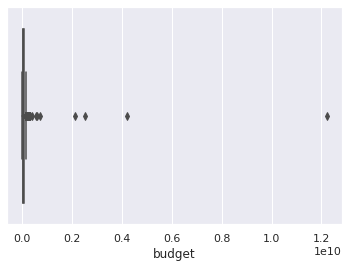

In [584]:
# From this graph, we can see there is one outlier in the 1.2*le10. And some outliers
# between 0.2 and 0.4*le10. Thus, we decide to set the range of budget < 0.3*le10.
seaborn.boxplot(x=movies['budget'])
movies1 = movies[movies["budget"]<300000000] 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


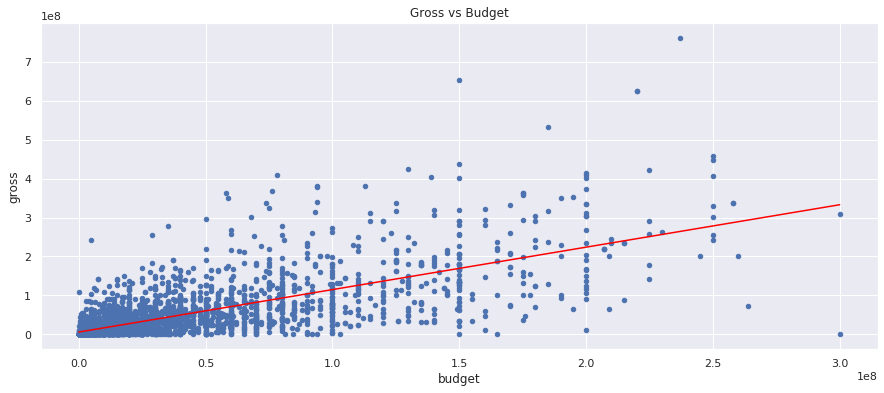

In [585]:
grossbudplot = movies2[['gross', 'budget']]
grossbudplot.plot(kind = 'scatter', y = 'gross', x = 'budget',figsize = (15,6), title = "Gross vs Budget" )
model1 = LinearRegression()
model1.fit(movies2[['budget']],movies2['gross'])
a1 = np.linspace(min(movies2['budget']),max(movies2['budget']),100)
a2 = model1.coef_*a1 + model1.intercept_
plt.plot(a1, a2, color='red')
plt.show()

According the graph above, it shows that the budget for most movies is under 100,000,000 dollors. The majority of movie's grosses is under 200,000,000 dollors. Also, we can see the budget and the gross are related. There is a positive linear correlation between film budget and the gross. 

#### 4.1.2 Gross vs IMDB Score

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


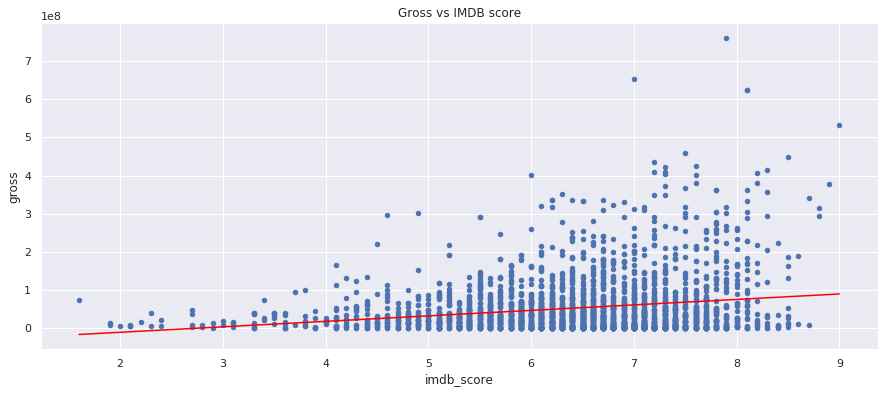

In [586]:
# scatter plot to show the relationship between gross and IMDB score
grossIMDBplot = movies[['gross', 'imdb_score']]
grossIMDBplot.plot(kind = 'scatter', y = 'gross', x = 'imdb_score',figsize = (15,6), title = "Gross vs IMDB score" )
model = LinearRegression()
model.fit(movies[['imdb_score']],movies['gross'])
aa1 = np.linspace(min(movies['imdb_score']),max(movies['imdb_score']),100)
aa2 = model.coef_*aa1 + model.intercept_
plt.plot(aa1, aa2, color='red')
plt.show()

From the plot we get, we can see there is no necessary relationship between IMDB score and budget. However, we can tell that movies with low score are likely to have a low gross. The scores of high-gross movies are generally range from 6 to 9.

### 4.2 Top 15 Movies Based on Gross and IMDB Score
We might be interested about which movies have the highest gross, so here it is! <p/>
A simple visualization of movies with **top 15 gross** is shown below. To do this, we need to sort the dataframe with respect to their gross in descending order, and then retrieve the first 20 rows from resulting dataframe. <p/>
seaborn.barplot enables us to plot the given data nicely.

Text(0.5, 1.0, 'Top 15 Movies with Highest Gross')

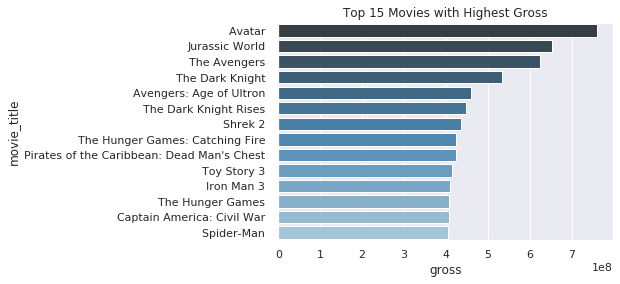

In [587]:
sort_by_gross = movies.sort_values(by=['gross'], ascending=False)
top15 = sort_by_gross.iloc[0:15, :]
top15_plt = seaborn.barplot(y=top15['movie_title'], x=top15['gross'], palette="Blues_d")
top15_plt.set_title("Top 15 Movies with Highest Gross")

If we are only interested in the new ones, we can also filter out old movies and leave the ones with title year from 2015.

Text(0.5, 1.0, 'Top 15 Movies with Highest Gross from 2014')

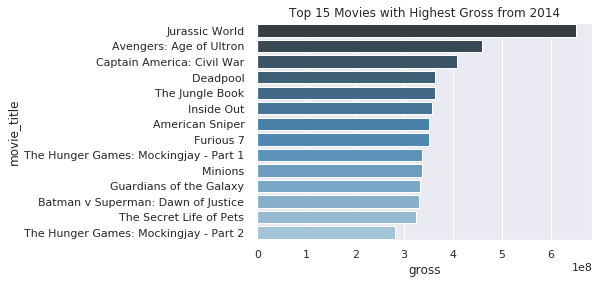

In [588]:
recent_5_years = movies[movies['title_year']>=2014]
sort_by_gross_recent = recent_5_years.sort_values(by=['gross'], ascending=False)
top15_recent = sort_by_gross_recent.iloc[0:15, :]

top15_recent_plt = seaborn.barplot(y=top15_recent['movie_title'], x=top15_recent['gross'], palette="Blues_d")
top15_recent_plt.set_title("Top 15 Movies with Highest Gross from 2014")

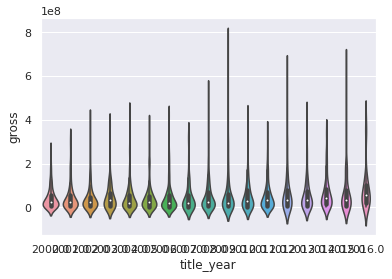

In [589]:
seaborn.violinplot(y=movies['gross'], x=movies['title_year'])

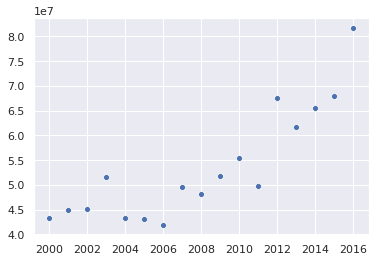

In [590]:
gross_list = []
years = []
for year, j in movies.groupby(['title_year']):
    years.append(year)
    gross_list.append(np.mean(j['gross']))
seaborn.scatterplot(x=years, y=gross_list)

In [591]:
movies.columns

Index(['movie_title', 'genres', 'title_year', 'imdb_score', 'budget', 'gross',
       'overall_facebook_likes', 'num_critic_for_reviews',
       'num_user_for_reviews', 'language', 'country', 'plot_keywords',
       'num_voted_users'],
      dtype='object')

Violin Plot

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


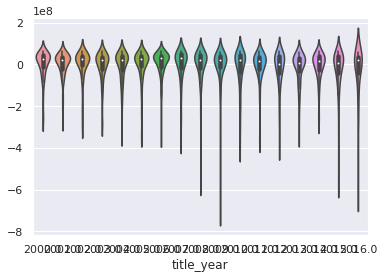

In [592]:
model = LinearRegression()
model.fit(movies[['title_year']], movies['gross'])
print(model)
residuals = np.array(model.predict(movies[['title_year']]))- np.array(list(movies['gross']))
seaborn.violinplot(movies['title_year'], residuals)
plt.show()

### 4.3 Analysis on Genres

### Distribution of Genres Over Years:
Next we will take a look at how the genres were distributed in each year. More specifically, for each genre, we will calculate the number of movies that the genre is categorized into annually. To do this, we need to collect information from the dataframe and process it. <p/>

As the dataframe was displayed above, we can see that the 'genres' category contains a collection of genres for each movie, so it's time to split them! In the meantime, we can add them to a set of genres, which is useful for later analysis.

In [593]:
genres = []
genre_set = set()

for g in movies['genres']:
  splitted = g.split('|')
  genres.append(splitted)
  for i in splitted:
    genre_set.add(i)

#movies['genres'] = genres
movies.loc[:, 'genres'] = genres
movies.head()

,movie_title,genres,title_year,imdb_score,budget,gross,overall_facebook_likes,num_critic_for_reviews,num_user_for_reviews,language,country,plot_keywords,num_voted_users
0,Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",2009.0,7.9,237000000.0,760505847.0,35791.0,723.0,3054.0,English,USA,avatar|future|marine|native|paraplegic,886204
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",2007.0,7.1,300000000.0,309404152.0,46563.0,302.0,1238.0,English,USA,goddess|marriage ceremony|marriage proposal|pi...,471220
2,Spectre,"[Action, Adventure, Thriller]",2015.0,6.8,245000000.0,200074175.0,96554.0,602.0,994.0,English,UK,bomb|espionage|sequel|spy|terrorist,275868
3,The Dark Knight Rises,"[Action, Thriller]",2012.0,8.5,250000000.0,448130642.0,259000.0,813.0,2701.0,English,USA,deception|imprisonment|lawlessness|police offi...,1144337
5,John Carter,"[Action, Adventure, Sci-Fi]",2012.0,6.6,263700000.0,73058679.0,26277.0,462.0,738.0,English,USA,alien|american civil war|male nipple|mars|prin...,212204


After we have the 'genres' holding lists of genres, we can do some calculation. The for loop after initialization computes sums, and the next one makes a lineplot accordingly. <p/>
(The default colors for line plots are not sufficient for our long list of genres. So, to avoid duplicates of color representation of the lines, we used the rainbow function from matplotlib.cm to generate unique rainbow colors for each genre.)

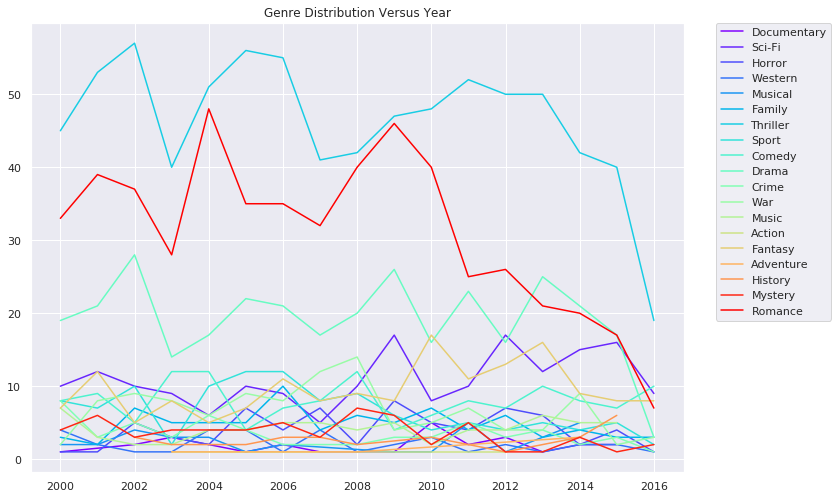

In [594]:
# initialization
genres_totalCount = dict()
genres_hash = dict()
years_total = dict()
for i in genre_set:
    genres_hash[i] = dict()
for i in movies['title_year'].unique():
    years_total[i] = 0

# sums up number of genre appearence each year
for i, j in movies.iterrows():
    for genre in j['genres']:
        if genre in genres_totalCount:
            genres_totalCount[genre] += 1
        else:
            genres_totalCount[genre] = 1
        years_total[j['title_year']] += 1
    if j['title_year'] in genres_hash[genre]:
        genres_hash[genre][j['title_year']] += 1
    else:
        genres_hash[genre][j['title_year']] = 1

cnt = 0
colors = cm.rainbow(np.linspace(0, 1, len(genre_set)))
for genre, years_cnt in genres_hash.items():
    years = list(years_cnt.keys())
    counts = list(years_cnt.values())

    seaborn.set(rc={'figure.figsize':(11.7,8.27)})
    ax = seaborn.lineplot(x=years, y=counts, label=genre, c=colors[cnt])
    ax.set_title("Genre Distribution Versus Year")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    cnt += 1

A pie chart is also plotted to make a better visualization of the major distribution of the genres. To make such pie chart, a new DataFrame is created so that genres can be stored as index of the DataFrame and total counts of each genre are stored in column.

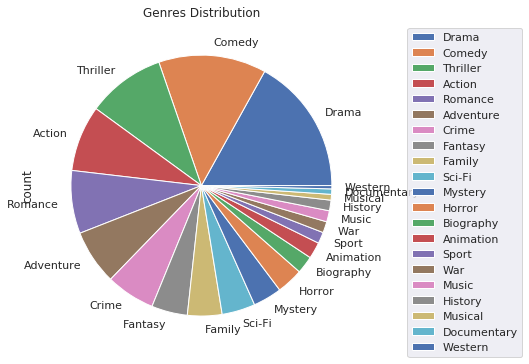

In [595]:
genres_col = []
count_col = []

for genre, count in genres_totalCount.items():
    genres_col.append(genre)
    count_col.append(count)

# Create a new DataFrame with index being genres and one column holding total counts
genres_ranking = pd.DataFrame({'count': count_col}, index=genres_col)

genres_ranking = genres_ranking.sort_values(by='count', ascending=False)
genres_ranking.plot.pie(y='count', figsize = (6,6), title="Genres Distribution").legend(bbox_to_anchor=(1.5, 1))

It turns out that simply using the number of occurrence of the genres in all movies is not the best way to describe distribution over years since the number of movies each year recorded in the dataset varies. As a result, the trend of each genre's over year might be misleading. So intead, we will calculate the ratio that a specific genre appears in movies with respect to the number of movies recorded each year. 

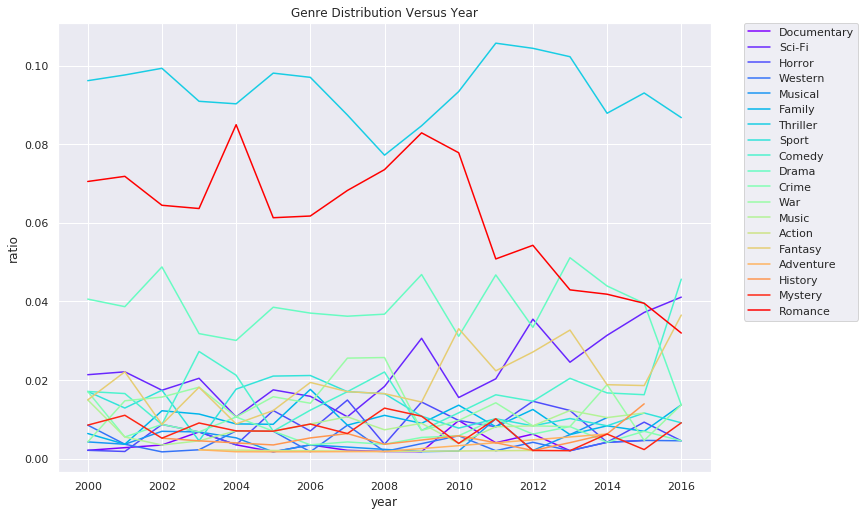

In [596]:
cnt = 0
for genre, years_cnt in genres_hash.items():
    years = list(years_cnt.keys())
    counts = list(years_cnt.values())
    ratio = []

    # Compute genres' ratio
    for i in range(len(years)):
        ratio.append(counts[i] / years_total[years[i]])

    seaborn.set(rc={'figure.figsize':(11.7,8.27)})
    ax = seaborn.lineplot(x=years, y=ratio, label=genre, c=colors[cnt])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_title("Genre Distribution Versus Year")
    ax.set(xlabel='year', ylabel='ratio')
    cnt += 1


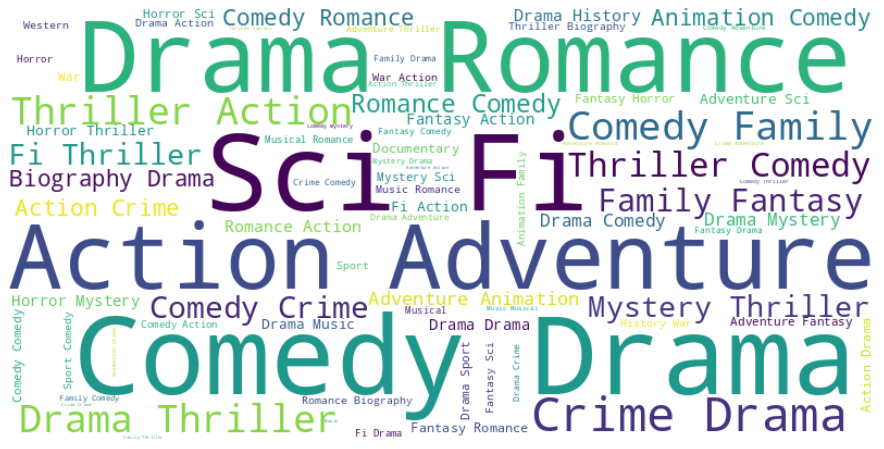

In [597]:
genres_all = []

# Collect all genre appearance into a single list
for i, j in movies.iterrows():
    genres_all.extend(j['genres'])

wc = WordCloud( width=800,
                height=400,
                background_color="white", 
                max_words=500,            
                max_font_size=100,        
                random_state=12) 

# Join the strings with a space
lis = ' '.join(genres_all)

# Generate word cloud
wc.generate(lis)
  
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')

plt.axis("off") 
plt.show() 

Of course people would like to watch a movie directed by their favorite director, or the one with their favorite actors involved. So popularity of director or actors of the movies might directly relate to its gross, and that's going to be our next step. In this section, we are going to find and discuss the relationship between a movie's gross and the popularity of its director and main actors. There can be various ways to represent popularity, and we choose to use the number of facebook likes. In the previous sections, we extracted and combined the facebook likes of the movie itself, director, actor 1, actor 2, and actor 3. So we can start from there!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


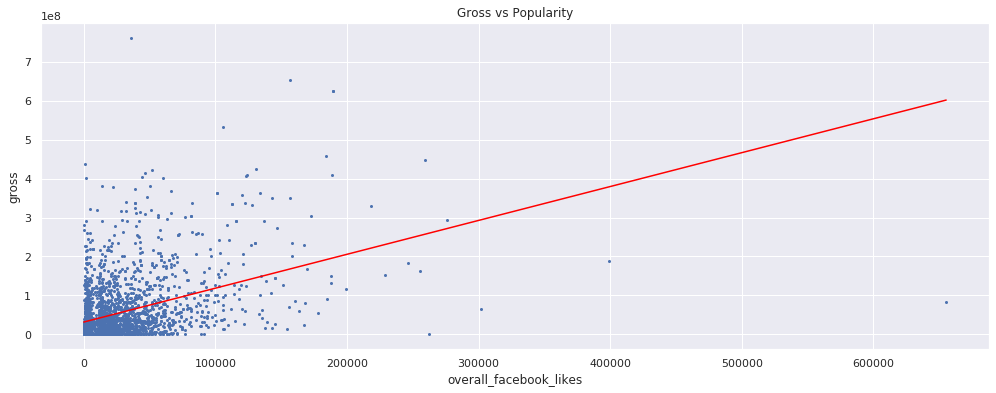

In [598]:
popularity_plot = movies[['gross', 'overall_facebook_likes']]
popularity_plot.plot(kind = 'scatter', y = 'gross', x = 'overall_facebook_likes',s=4, figsize = (17,6), title = "Gross vs Popularity" )
model = LinearRegression()
model.fit(movies[['overall_facebook_likes']],movies['gross'])
aa1 = np.linspace(min(movies['overall_facebook_likes']),max(movies['overall_facebook_likes']),100)
aa2 = model.coef_*aa1 + model.intercept_
plt.plot(aa1, aa2, color='red')

A clearer visualization of the data is given below by removing the outliers with director and actors' combined facebook likes exceeding 200000. Later numerical analysis will still be operated on the original data.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


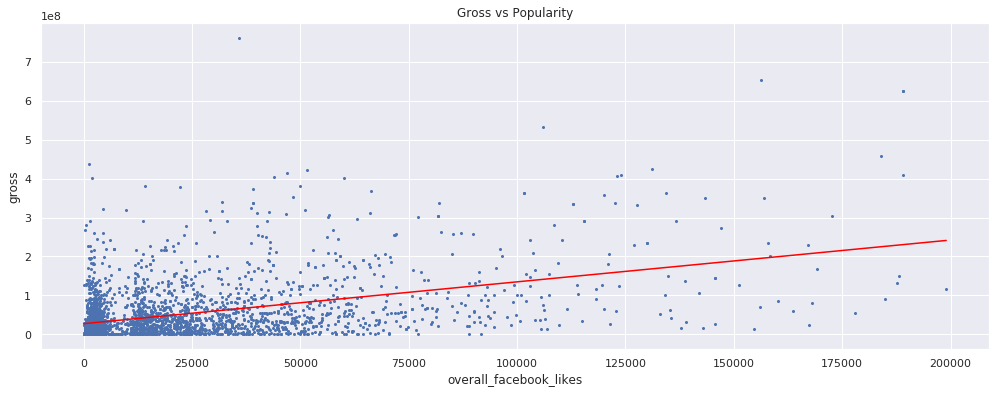

In [599]:
movies_modified = movies[movies['overall_facebook_likes'] < 200000]
popularity_plot = movies_modified[['gross', 'overall_facebook_likes']]
popularity_plot.plot(kind = 'scatter', y = 'gross', x = 'overall_facebook_likes',s=4, figsize = (17,6), title = "Gross vs Popularity" )
model = LinearRegression()
model.fit(movies_modified[['overall_facebook_likes']],movies_modified['gross'])
aa1 = np.linspace(min(movies_modified['overall_facebook_likes']),max(movies_modified['overall_facebook_likes']),100)
aa2 = model.coef_*aa1 + model.intercept_
plt.plot(aa1, aa2, color='red')